Aleatoire Object:
Nombre d'échantillons: 20
Moyenne: -0.30030603633949504
Classe Aléatoire
Corrélation: [0.0102798  2.31882031 0.12698237 0.48502433 4.89633686 2.36852171
 0.16628945 0.06697386 0.58523252 0.02352524 0.21597319 2.34029288
 0.45393757 0.01676219 0.65007884 0.01283344 8.16361625 6.32083222
 0.17055965 0.10801988]


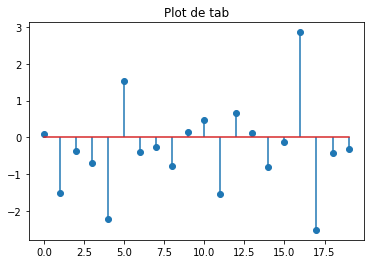


Deterministe Object:
Nombre d'échantillons: 20
Moyenne: 0.0
Corrélation: 0.8999999999999997


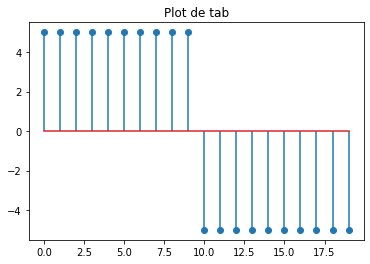


Classe Aléatoire
Result of Addition:
Nombre d'échantillons: 20
Moyenne: -0.30030603633949504
Corrélation: 0.8234903309224778


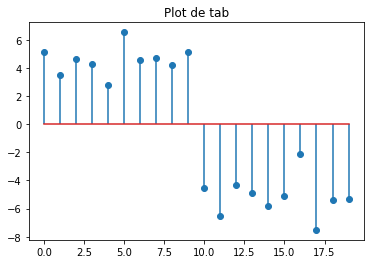

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Signal:
    def __init__(self, nbr):
        self.nbr = nbr
        self.tab = np.zeros(nbr)

    def echantillons(self):
        return self.nbr

    def moyenne(self):
        return np.mean(self.tab)

    def correlation(self):
        return np.corrcoef(self.tab[:-1], self.tab[1:])[0, 1]

    def display(self):
        print(f"Nombre d'échantillons: {self.nbr}")
        print(f"Moyenne: {self.moyenne()}")
        print(f"Corrélation: {self.correlation()}")

        plt.stem(self.tab)
        plt.title("Plot de tab")
        plt.show()

class Aleatoire(Signal):
    def __init__(self, nbr, sigma, mean):
        super().__init__(nbr)
        self.sigma = sigma
        self.mean = mean
        self.Init_Alea()

    def Init_Alea(self):
        self.tab = np.random.randn(self.nbr) * self.sigma + self.mean

    def correlation(self):
        print("Classe Aléatoire")
        return np.power(self.tab, 2)

class Deterministe(Signal):
    def __init__(self, nbr, amplitude):
        super().__init__(nbr)
        self.amplitude = amplitude
        self.valeurs()

    def valeurs(self):
        self.tab[:self.nbr//2] = self.amplitude
        self.tab[self.nbr//2:] = -self.amplitude

def Addition(aleatoire, deterministe):
    result = Deterministe(aleatoire.nbr, 0)  
    result.tab = aleatoire.tab + deterministe.tab
    return result

if __name__ == "__main__":

    aleatoire_obj = Aleatoire(nbr=20, sigma=1, mean=0)
    deterministe_obj = Deterministe(nbr=20, amplitude=5)

    print("Aleatoire Object:")
    aleatoire_obj.display()
    print()

    print("Deterministe Object:")
    deterministe_obj.display()
    print()

    aleatoire_obj.correlation()
    
    S = Addition(aleatoire_obj, deterministe_obj)

    print("Result of Addition:")
    S.display()


In [3]:
class Employee:
    def __init__(self, nom, id, pin=500):
        self.nom = nom
        self.id = id
        self.pin = pin

    def calcul_prime(self, a):
        if a:
            return self.pin * 2
        else:
            return self.pin * 0.5

    def salaire(self, prime):
        return self.pin * prime

    def affiche(self, a):
        prime = self.calcul_prime(a)
        salaire = self.salaire(prime)
        print("Nom: ", self.nom)
        print("ID: ", self.id)
        print("Salaire: ", salaire)
        print("Statut: Employé")


class Ingenieur(Employee):
    def __init__(self, nom, id, etat, pin=500):
        super().__init__(nom, id, pin)
        self.etat = etat

    def salaire(self, prime):
        if self.etat == "stagiaire":
            return self.pin * 4 * prime
        else:
            return self.pin * 6 * prime

    def affiche(self, a):
        prime = self.calcul_prime(a)
        salaire = self.salaire(prime)
        print("Nom: ", self.nom)
        print("ID: ", self.id)
        print("Salaire: ", salaire)
        print("Statut: Ingénieur + ", self.etat)


class Technicien(Employee):
    
    def salaire(self, prime):
        return self.pin * 2 * prime

    def affiche(self, a):
        prime = self.calcul_prime(a)
        salaire = self.salaire(prime)
        print("Nom: ", self.nom)
        print("ID: ", self.id)
        print("Salaire: ", salaire)


employe = Employee("dounia", 1)
ingenieur = Ingenieur("nouha", 2, "stagiaire")
technicien = Technicien("Bill", 3)

employe.affiche(True)
ingenieur.affiche(False)
technicien.affiche(True)

Nom:  dounia
ID:  1
Salaire:  500000
Statut: Employé
Nom:  nouha
ID:  2
Salaire:  500000.0
Statut: Ingénieur +  stagiaire
Nom:  Bill
ID:  3
Salaire:  1000000
